In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [163]:
# Dataset import
dataset = pd.read_csv('data/trade_data_2.csv')
X = dataset.iloc[:, 3:].values
Y = dataset.iloc[:, 1].values
pip_rets = dataset.iloc[:, 2].values

In [164]:
# Dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [165]:
# Init ANN
classifier = Sequential()
# Add input layer and first hidden layer
classifier.add(Dense(7, input_shape = (len(X_train[0, :]), ), kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.1))

# Add output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cfit = classifier.fit(X_train, Y_train, batch_size = 15, epochs = 200)
Y_predict = classifier.predict(X_test)

Epoch 1/200
624/624 [==============================] - 1s - loss: 3.7025 - acc: 0.3590     
Epoch 2/200
624/624 [==============================] - 0s - loss: 2.6755 - acc: 0.3590     
Epoch 3/200
624/624 [==============================] - 0s - loss: 2.4957 - acc: 0.3590     
Epoch 4/200
624/624 [==============================] - 0s - loss: 2.3549 - acc: 0.3590     
Epoch 5/200
624/624 [==============================] - 0s - loss: 2.2341 - acc: 0.3590     
Epoch 6/200
624/624 [==============================] - 0s - loss: 2.1322 - acc: 0.3590     
Epoch 7/200
624/624 [==============================] - 0s - loss: 2.0314 - acc: 0.3590     
Epoch 8/200
624/624 [==============================] - 0s - loss: 1.9412 - acc: 0.3590     
Epoch 9/200
624/624 [==============================] - 0s - loss: 1.8681 - acc: 0.3590     
Epoch 10/200
624/624 [==============================] - 0s - loss: 1.7791 - acc: 0.3590     
Epoch 11/200
624/624 [==============================] - 0s - loss: 1.7097 - acc

624/624 [==============================] - 0s - loss: 0.6904 - acc: 0.5897     
Epoch 88/200
624/624 [==============================] - 0s - loss: 0.6804 - acc: 0.5994     
Epoch 89/200
624/624 [==============================] - 0s - loss: 0.6768 - acc: 0.6186     
Epoch 90/200
624/624 [==============================] - 0s - loss: 0.6812 - acc: 0.6154     
Epoch 91/200
624/624 [==============================] - 0s - loss: 0.6637 - acc: 0.6202     
Epoch 92/200
624/624 [==============================] - 0s - loss: 0.6785 - acc: 0.6138     
Epoch 93/200
624/624 [==============================] - 0s - loss: 0.6815 - acc: 0.6090     
Epoch 94/200
624/624 [==============================] - 0s - loss: 0.6789 - acc: 0.6186     
Epoch 95/200
624/624 [==============================] - 0s - loss: 0.6790 - acc: 0.6122     
Epoch 96/200
624/624 [==============================] - 0s - loss: 0.6778 - acc: 0.6058     
Epoch 97/200
624/624 [==============================] - 0s - loss: 0.6832 - acc: 0.

624/624 [==============================] - 0s - loss: 0.6737 - acc: 0.5994     
Epoch 174/200
624/624 [==============================] - 0s - loss: 0.6626 - acc: 0.6346     
Epoch 175/200
624/624 [==============================] - 0s - loss: 0.6538 - acc: 0.6442     
Epoch 176/200
624/624 [==============================] - 0s - loss: 0.6657 - acc: 0.6154     
Epoch 177/200
624/624 [==============================] - 0s - loss: 0.6732 - acc: 0.6010     
Epoch 178/200
624/624 [==============================] - 0s - loss: 0.6493 - acc: 0.6474     
Epoch 179/200
624/624 [==============================] - 0s - loss: 0.6528 - acc: 0.6314     
Epoch 180/200
624/624 [==============================] - 0s - loss: 0.6709 - acc: 0.6186     
Epoch 181/200
624/624 [==============================] - 0s - loss: 0.6535 - acc: 0.6346     
Epoch 182/200
624/624 [==============================] - 0s - loss: 0.6606 - acc: 0.6202     
Epoch 183/200
624/624 [==============================] - 0s - loss: 0.6574

    0   1
0  49  51
1  85  83


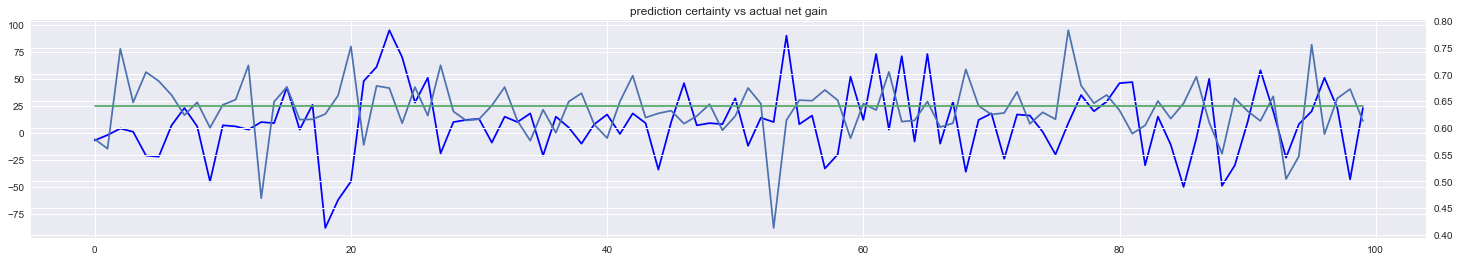

Acc	 0.4925373134328358
AP	 0.626865671642
AN	 0.373134328358


In [166]:
Y_predict_ = (Y_predict >= sum(Y_predict)/len(Y_predict))#(Y_predict >= 0.5)
#print(sum(Y_test)/len(Y_test))

Z_predict = [0]*len(Y_predict)
for i in range(len(Z_predict)):
    if Y_predict[i] >= np.mean(Y_predict) + np.std(Y_predict):
        Z_predict[i] = 1
    elif Y_predict[i] <= np.mean(Y_predict) - np.std(Y_predict):
        Z_predict[i] = 0
    else:
        Z_predict[i] = 0.5
        
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict_))
print(cm)

Y_p = [int(Y_predict_[i]) for i in range(len(Y_predict_))]

plt.figure(figsize=(25, 4))
plt.title('prediction certainty vs actual net gain')
plt.plot(pip_rets[-len(Y_test):-len(Y_test)+100], 'b')
#plt.twinx().plot([sum(Y_predict_)/len(Y_predict_)]*100)

a = plt.twinx()
a.plot(Y_predict[:100])
a.plot([sum(Y_predict)/len(Y_predict)]*100)
plt.show()

add = 0
for i in range(len(Y_p)):
    if Y_predict_[i] == Y_test[i]:
        add += 1

print('Acc\t', add/len(Y_test))
print('AP\t', sum(Y_test)/len(Y_test))
print('AN\t', 1 - sum(Y_test)/len(Y_test))
#print('Alpha\t', add/len(Y_p) - sum(Y_test)/len(Y_test))

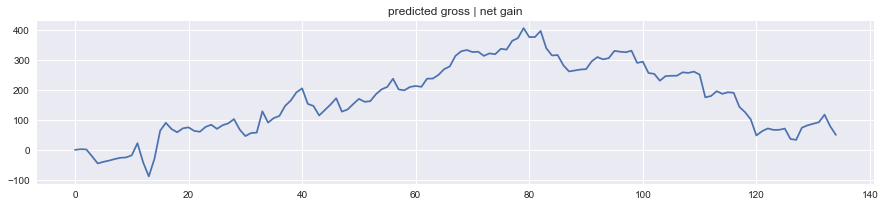

gross wr 0.6269
net wr	 0.6194
gross	 291
net	 49.8
p/t	 0.368888888889


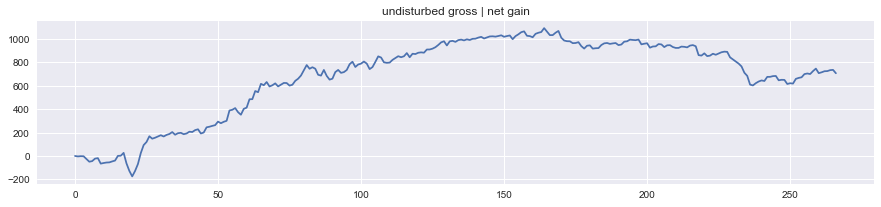

gross wr 0.6541
net wr	 0.6391
gross	 1184
net	 705.2
p/t	 2.64119850187


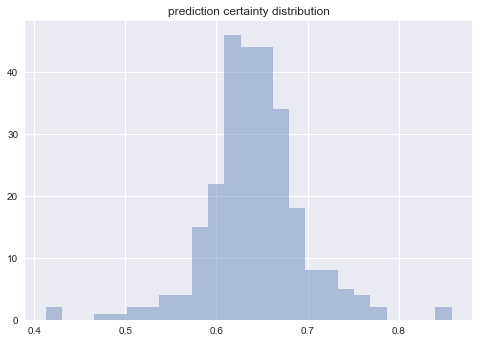

In [167]:
gross_pips = [0]
Y_p_avg = sum(Y_predict)/len(Y_predict)
for i in range(len(Y_test)):
    if Y_predict_[i] == 1:
        gross_pips.append(gross_pips[-1] + pip_rets[-len(Y_test) + i]) # index might be skewed (+-)1
        
    elif Y_predict[i] < 0.3 and 1==2:
        gross_pips.append(gross_pips[-1] - pip_rets[-len(Y_test) + i])


net_pips = [gross_pips[i] - 1.8*i for i in range(len(gross_pips))]

plt.figure(figsize=(15, 3))
plt.title('predicted gross | net gain')
#plt.plot(gross_pips)
plt.plot(net_pips)
plt.show()

def get_winrate(pips):
    ret_map = []
    for i in range(1, len(pips)):
        if pips[i] - pips[i-1] > 0:
            ret_map.append(1)
        else:
            ret_map.append(0)
                
    return sum(ret_map)/(len(pips)-1)
    
print('gross wr %.4f' % get_winrate(gross_pips))
print('net wr\t %.4f' % get_winrate(net_pips))
print('gross\t', gross_pips[-1])
print('net\t', net_pips[-1])
print('p/t\t', net_pips[-1]/len(net_pips))

plt.figure(figsize=(15, 3))
plt.title('undisturbed gross | net gain')
curve = [sum(pip_rets[-int(0.3*len(pip_rets)):-int(0.3*len(pip_rets))+i]) for i in range(int(0.3*len(pip_rets)))]

net_curve = [curve[i] - 1.8*i for i in range(len(curve))]
#plt.plot(curve)
plt.plot(net_curve)
plt.show()

print('gross wr %.4f' % get_winrate(curve))
print('net wr\t %.4f' % get_winrate(net_curve))
print('gross\t', curve[-1])
print('net\t', net_curve[-1])
print('p/t\t', net_curve[-1]/len(net_curve))

import seaborn as sns
plt.figure()
plt.title('prediction certainty distribution')
sns.distplot(Y_predict, kde=False)
plt.show()

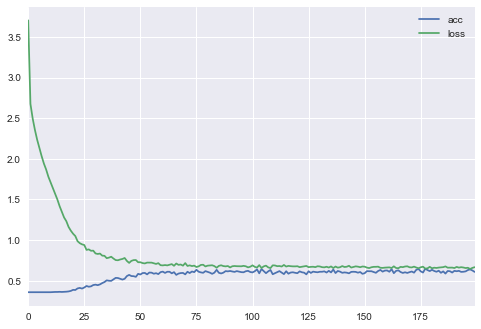

In [168]:
plt.figure()
pd.DataFrame(cfit.history).plot()
plt.show()